In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def b_k(y_k, u_k):
    return 0

def phi_k(y_k, u_k):
    return np.array([0.2 * y_k + 0.1 * u_k])

In [10]:
# Define Dimensions
n_x = 2
n_theta = 6

In [11]:
# Initialise parameters
P = np.eye(n_x)
R = 0.1 * np.eye(n_x)
Q = 0.1 * np.eye(n_x)
Y = np.zeros((n_x, n_theta))
S = np.eye(n_theta)

llama = 0.995
a = 0.999

x_hat = np.zeros((n_x,1))
theta_hat = np.zeros((n_theta,1))

# Initial state
x_true = np.array([[10.0], [2.0]])  # Initial position and velocity
F_k = 0.5  # Constant force applied

In [12]:
# System parameters (unknown, to be estimated)
k_true = 5  # Spring constant
b_true = 2  # Damping coefficient
m_true = 10  # Mass

In [13]:
N = 1000
Delta_t = 0.1
x_estimates = []
x_trues = []
theta_estimates = []
time = np.arange(N) * Delta_t

In [14]:
for k in range(N):
    Phi_k = np.array([
        [x_true[0, 0], x_true[1, 0], F_k, 0, 0, 0],
        [0, 0, 0, x_true[0, 0], x_true[1, 0], F_k]
    ])

    # Compute gains
    P = P + Q
    Sigma = P + R
    K = P @ np.linalg.inv(Sigma)
    P = (np.eye(n_x) - K) @ P

    Y = (np.eye(n_x) - K) @ Y + (np.eye(n_x) - K) @ Phi_k
    Omega = Y + Phi_k
    Lambda = np.linalg.inv(llama * Sigma + Omega @ S @ Omega.T)
    Pi = S @ Omega.T @ Lambda
    S = (1 / llama) * S - (1/ llama) * S @ Omega.T @ Lambda @ Omega @ S

    # Estimate state and parameters
    y_k = x_true  # Assume perfect measurements (no noise)
    innovation = y_k - (x_hat + Phi_k @ theta_hat)
    theta_update = Pi @ innovation
    x_hat = x_hat + Phi_k @ theta_hat + K @ innovation + Y @ theta_update
    theta_hat = theta_hat + theta_update
    
    # Update Covariance matrices
    Q = a * Q + (1 - a) * (K @ (innovation) @ (innovation).T @ K.T)
    R = a * R + (1 - a) * (innovation @ innovation.T + P)

    # Store results
    x_estimates.append(x_hat.flatten())
    theta_estimates.append(theta_hat.flatten())

    # True system update
    x_true = x_true + np.array([
        [0, Delta_t],
        [-k_true * Delta_t / m_true, -b_true * Delta_t / m_true]
    ]) @ x_true + np.array([[0], [Delta_t / m_true]]) * F_k

    x_trues.append(x_true.flatten())

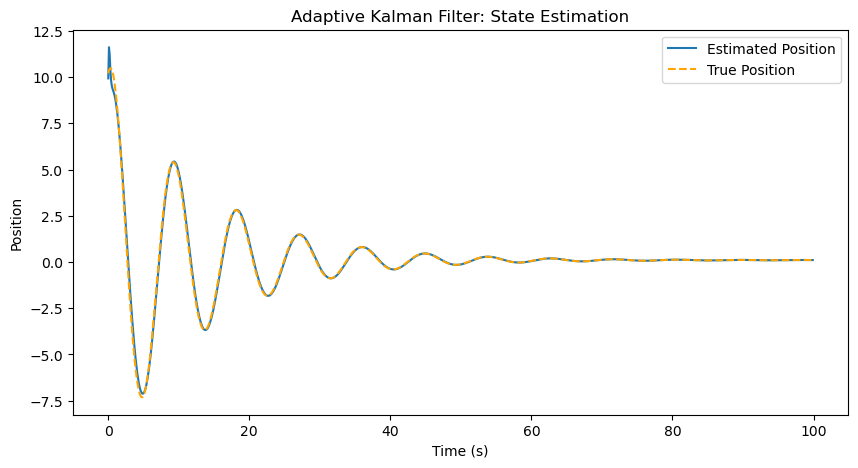

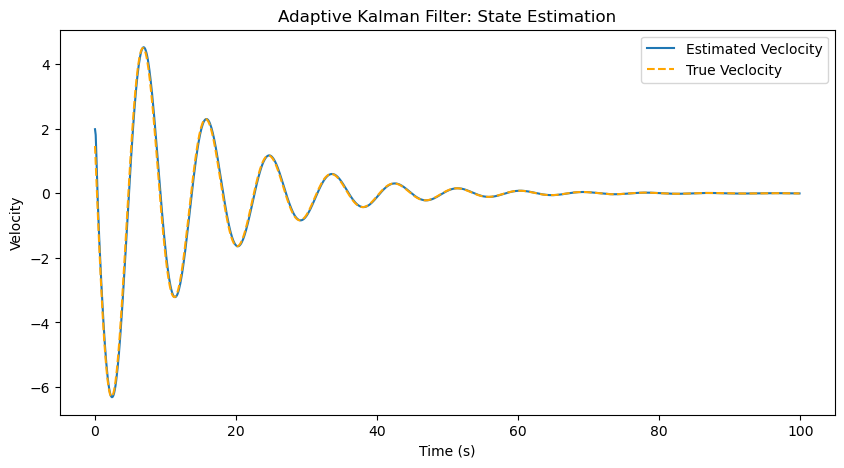

In [15]:
# Convert lists to arrays
x_estimates = np.array(x_estimates)
theta_estimates = np.array(theta_estimates)
x_trues = np.array(x_trues)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, x_estimates[:, 0], label="Estimated Position")
plt.plot(time, x_trues[:, 0], linestyle="--", color="orange", label="True Position")
# plt.plot(time, x_estimates[:, 1], label="Estimated Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.legend()
plt.title("Adaptive Kalman Filter: State Estimation")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(time, x_estimates[:, 1], label="Estimated Veclocity")
plt.plot(time, x_trues[:, 1], linestyle="--", color="orange", label="True Veclocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity")
plt.legend()
plt.title("Adaptive Kalman Filter: State Estimation")
plt.show()

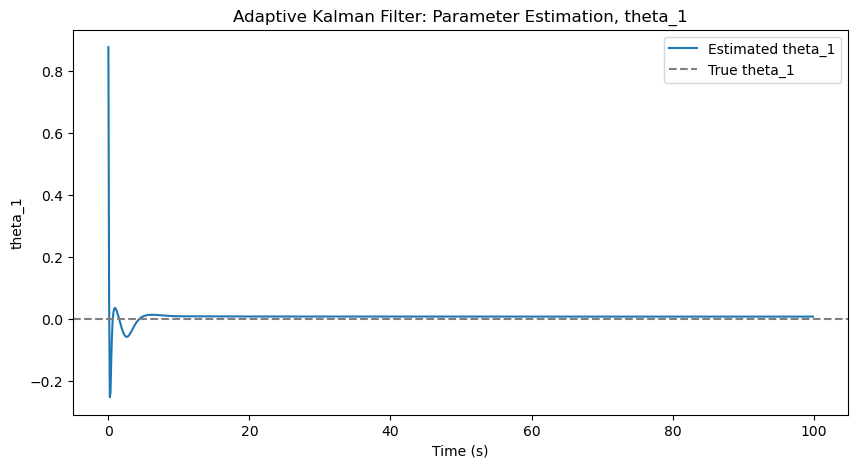

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 0], label="Estimated theta_1")
# plt.plot(time, theta_estimates[:, 2], label="Estimated k/m")
# plt.plot(time, theta_estimates[:, 3], label="Estimated b/m")
plt.axhline(0, linestyle="--", color="gray", label="True theta_1")
# plt.axhline(-b_true / m_true, linestyle="--", color="gray", label="True b/m")
plt.xlabel("Time (s)")
plt.ylabel("theta_1")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation, theta_1")
plt.show()

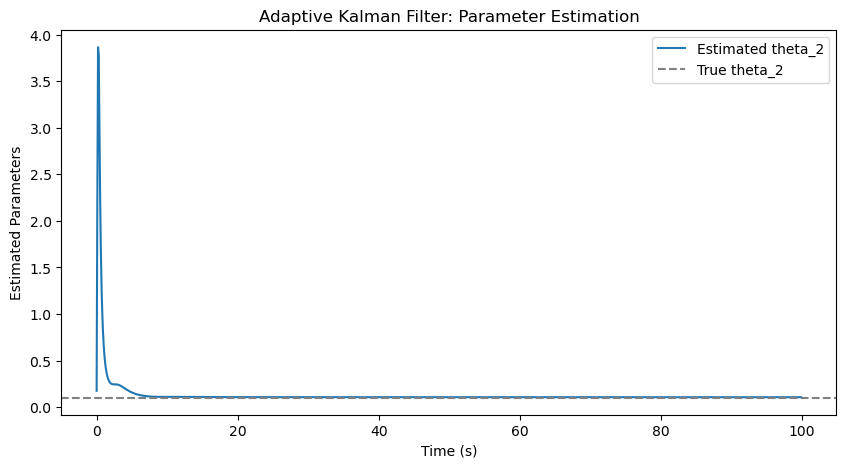

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 1], label="Estimated theta_2")
plt.axhline(0.1, linestyle="--", color="gray", label="True theta_2")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

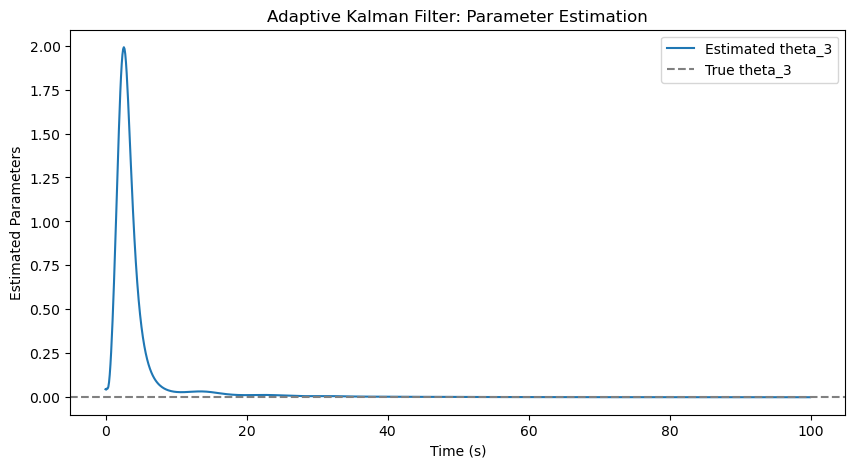

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 2], label="Estimated theta_3")
plt.axhline(0, linestyle="--", color="gray", label="True theta_3")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

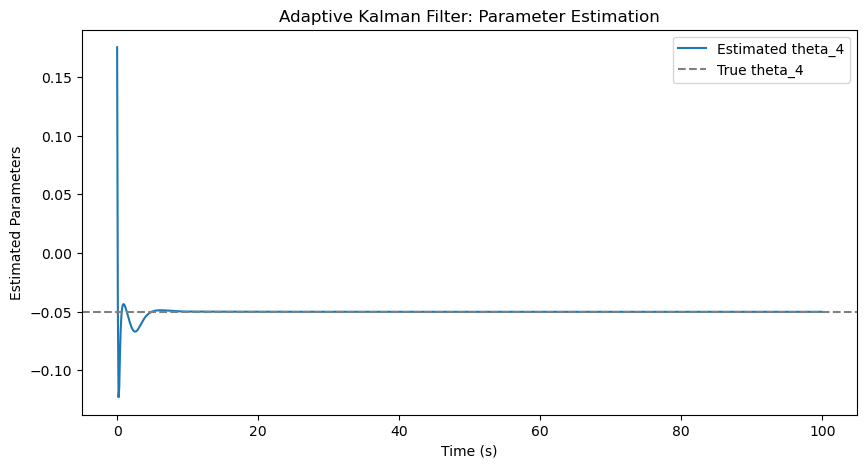

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 3], label="Estimated theta_4")
plt.axhline(-k_true * 0.1 / m_true, linestyle="--", color="gray", label="True theta_4")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

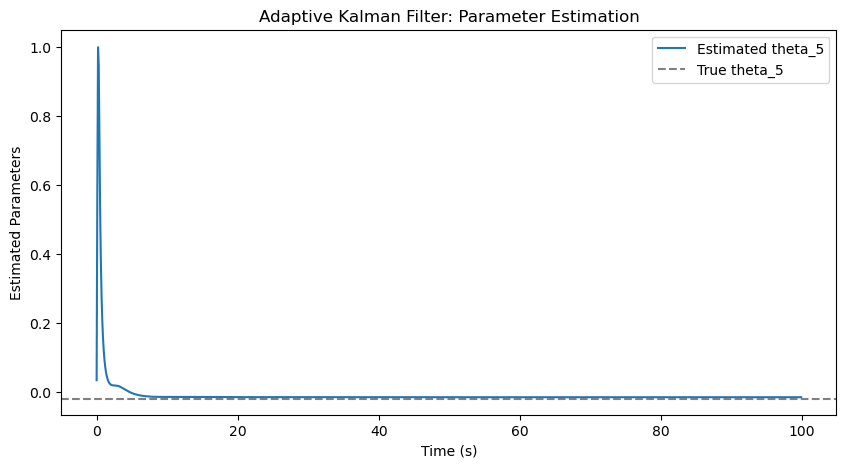

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 4], label="Estimated theta_5")
plt.axhline(-b_true * 0.1 / m_true, linestyle="--", color="gray", label="True theta_5")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()

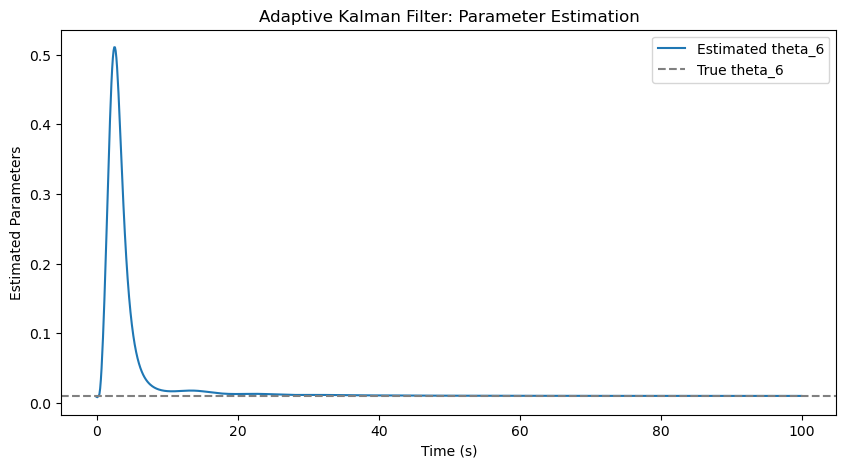

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(time, theta_estimates[:, 5], label="Estimated theta_6")
plt.axhline(0.1 / m_true, linestyle="--", color="gray", label="True theta_6")
plt.xlabel("Time (s)")
plt.ylabel("Estimated Parameters")
plt.legend()
plt.title("Adaptive Kalman Filter: Parameter Estimation")
plt.show()